### Student Information
Name:吳義路

Student ID:107065518

GitHub ID:jackraken

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

# Take home exercises #

In [1]:
### Begin Assignment Here!
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [2]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X2 = X
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
display(X[X["category_name"]=="comp.graphics"][::10][:5])
display(X.query('category_name == "comp.graphics"').iloc[::10].iloc[:5])

# I use two different approach to do a same query,
# which is find out the first 5 record of every 10th record in dataframe where category_name is comp.graphics

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
43,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1,comp.graphics
76,From: sts@mfltd.co.uk (Steve Sherwood (x5543))...,1,comp.graphics
107,From: samson@prlhp1.prl.philips.co.uk (Mark Sa...,1,comp.graphics
172,From: thinman@netcom.com (Technically Sweet) S...,1,comp.graphics


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
43,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1,comp.graphics
76,From: sts@mfltd.co.uk (Steve Sherwood (x5543))...,1,comp.graphics
107,From: samson@prlhp1.prl.philips.co.uk (Mark Sa...,1,comp.graphics
172,From: thinman@netcom.com (Technically Sweet) S...,1,comp.graphics


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer
from panda documents, it says:

>NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings '' or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True)

In the example above, case 2 , 3 and 5 are all strings with different values, so they will return false in isnull() function. 


In [6]:
X_sample = X.sample(n=1000)

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [7]:
# Answer here
print ((X != X2).sum())

text             0
category         0
category_name    0
dtype: int64


### Answer

The query above shows there are no different compared to the previous dataframe

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [8]:
# Answer here
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 4

X_val = X.category_name.value_counts().values
X_sample_val = X_sample.category_name.value_counts().values

fig, ax = plt.subplots()
index = np.arange(n_groups)

bar_width = 0.2
opacity = 0.4

rects1 = ax.bar(index, X_val, bar_width,
                alpha=opacity, color='blue',
                label='category_name (origin)')

rects2 = ax.bar(index + bar_width, X_sample_val, bar_width,
                alpha=opacity, color='orange',
                label='category_name (sampled)')

# ax.set_xlabel('category_name')
ax.set_ylabel('number of data')
ax.set_title('category_name comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

fig.tight_layout()
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [10]:
# Answer here
[count_vect.get_feature_names()[i] for i in X_counts[4,0:100].nonzero()[1]]

# this query shows all term where their frequency is not zero (in first 100 terms), 
# since the first is '00', the other one is term '01'

['01', '00']

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

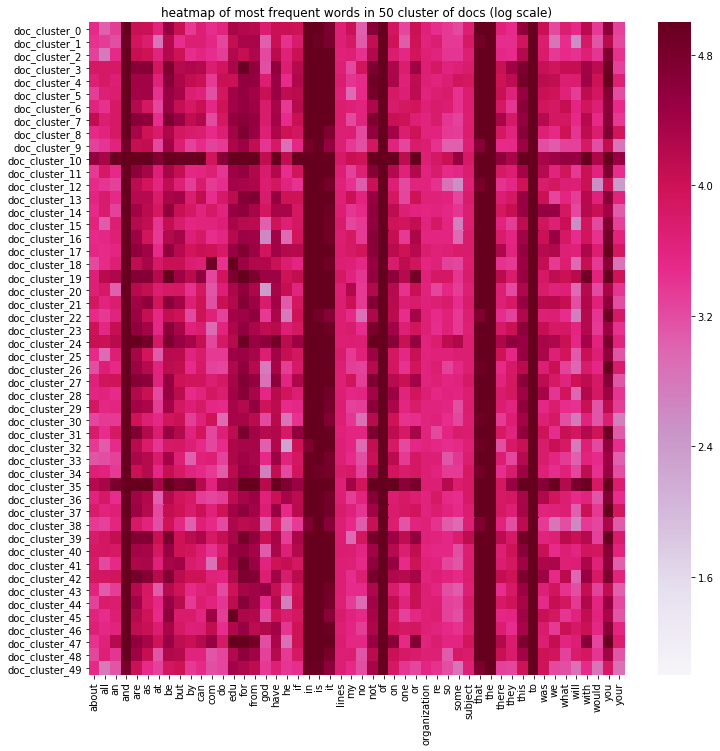

In [11]:
# Answer here
import seaborn as sns

# since the dimension of matrix is too big to put in one graph, 
# I just chhose 50 most frequent words to show, whose frequency are totally greater than 1750
term_frequency_sum = X_counts.sum(axis=0)
indices = np.where(term_frequency_sum > 1750)[1]

frequent_terms = [count_vect.get_feature_names()[i] for i in indices]
plot_y = ["doc_cluster_"+ str(i) for i in list(X.index)[0:50]]

X_counts_tmp = X_counts[:, indices]

# in addition to make the dimesion of two axis fit each other,
# I also cluster documents into 50 groups by adding their vectors
X_compressed = np.zeros([50,50])

for i in range(50):
    X_compressed[i] = np.log(X_counts_tmp[40*i:40*(i+1)].sum(axis=0))

# because the scale of frequency is too big, take log scale to reduce it  
    
X_compressed.mean()
plt.subplots(figsize=(12, 12))
plt.title("heatmap of most frequent words in 50 cluster of docs (log scale)")
ax = sns.heatmap(X_compressed, xticklabels=frequent_terms, yticklabels=plot_y,
                 cmap="PuRd", vmin=1, vmax=5)

# as we can see in the figure, the words like 'and', 'is', 'the' appers a lot in almost every document

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

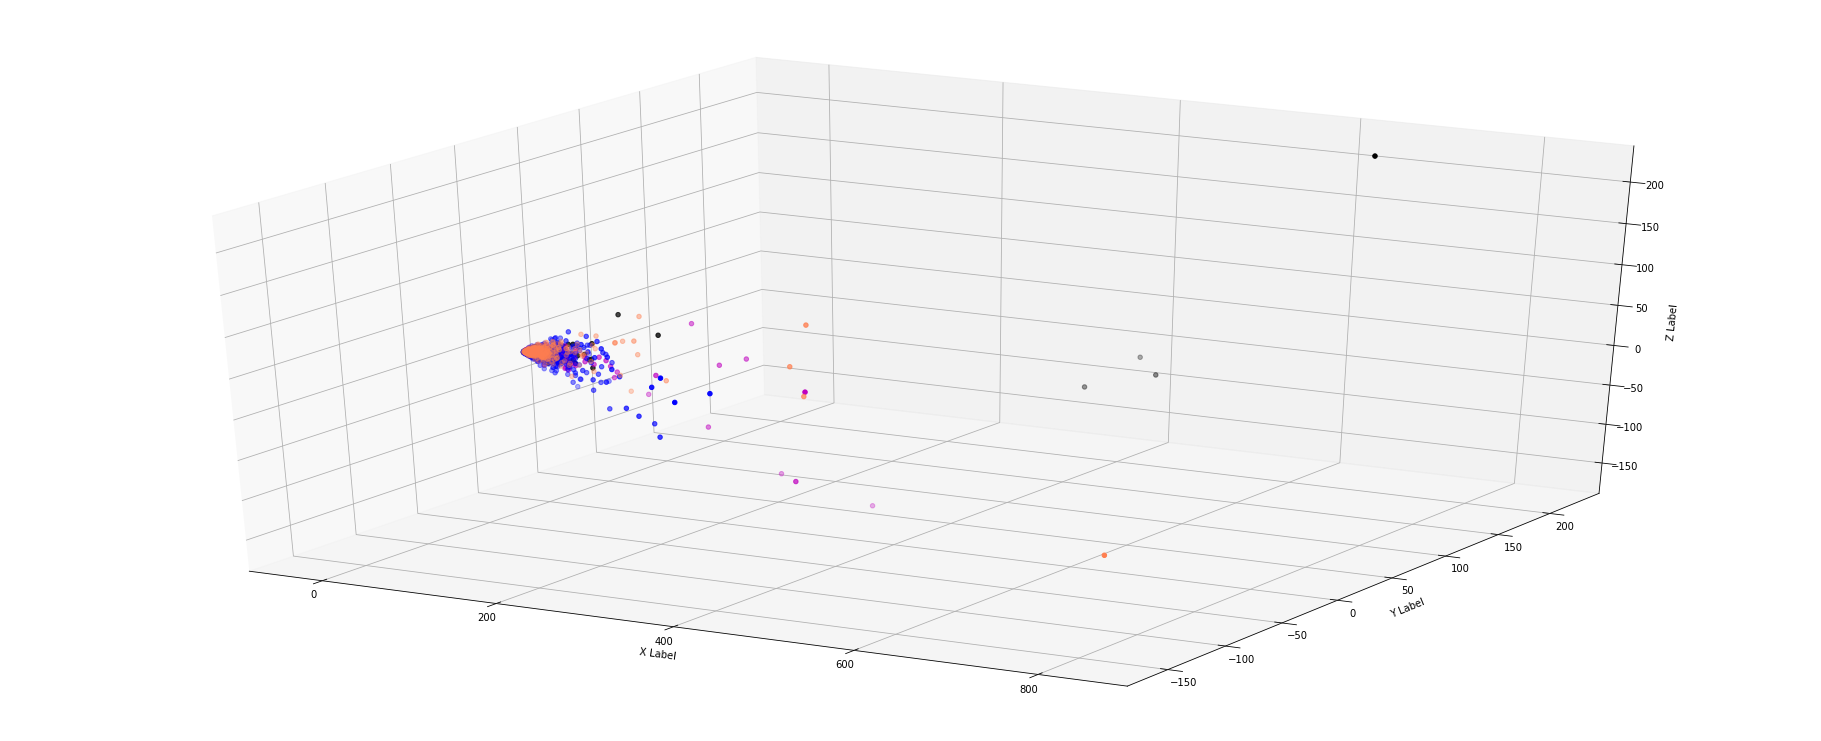

In [12]:
# Answer here
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

#ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

In [13]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above. 

In [14]:
# Answer here
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import helpers.text_analysis as ta

init_notebook_mode(connected=True)         # initiate notebook for offline plot

iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

D:\Users\User\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [15]:
# Answer here
important_frequency = []
important_frequency_term = []
for idx,frequency in enumerate(term_frequencies):
    if frequency > 500:
        important_frequency_term.append(count_vect.get_feature_names()[idx])
        important_frequency.append(frequency)

#only show terms with frequency greater than 500
iplot(ta.plot_word_frequency([important_frequency_term, important_frequency], "Term Frequency Distribution"))

D:\Users\User\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

[29825, 17660, 17222, 13017, 12343, 11226, 10723, 8447, 6157, 5962]


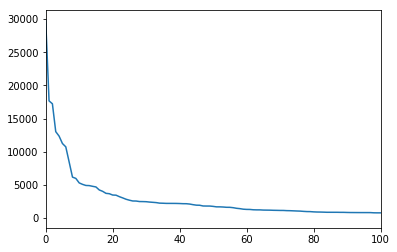

In [16]:
# Answer here
# term_frequency_pairs = []
# for (term, frequency) in zip(count_vect.get_feature_names(), term_frequencies):
#     term_frequency_pairs.append((term, frequency))

term_frequencies = sorted(term_frequencies, reverse=True)
print(term_frequencies[:10])

plt.xlim(right=100)
plt.plot(term_frequencies)

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [18]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

#Yes, it can work

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


# New Dataset #

In [19]:
Xs = []
Ys = []
data_dir = '../sentiment labelled sentences/'
files = ['imdb_labelled.txt','amazon_cells_labelled.txt','yelp_labelled.txt']

for file in files:
    with open(data_dir+file, encoding='utf-8') as f:
        content = f.readlines()
        for line in content:
            x = line.split("\t")[0].strip()
            y = line.split("\t")[1].strip()
            Xs.append(x)
            Ys.append(y)

In [20]:
#construct dataframe
df = pd.DataFrame({'sentence':Xs, 'label':Ys})
df.head()

,sentence,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [21]:
#checking whether there has missing values
df.isnull().sum() 

sentence    0
label       0
dtype: int64

In [22]:
sum(df.duplicated())
#show number of duplicate data 

18

In [23]:
#remove duplicated data
df.drop_duplicates(keep="first", inplace=True)
sum(df.duplicated())

0

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))
#df[0:4]["unigrams"]

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df.sentence)

In [27]:
X_counts

<2982x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31513 stored elements in Compressed Sparse Row format>

In [28]:
plot_satrt_id = 100
plot_end_id = 120
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[plot_satrt_id:plot_end_id]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[plot_satrt_id:plot_end_id]]
plot_z = X_counts[plot_satrt_id:plot_end_id, plot_satrt_id:plot_end_id].toarray()

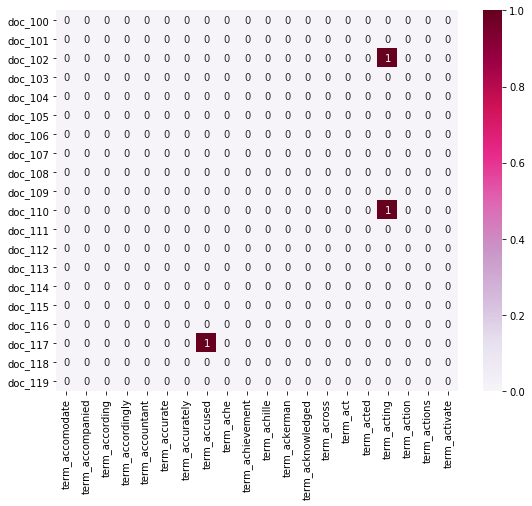

In [29]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [30]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [31]:
X_counts.shape

(2982, 5155)

[-0.82249466  1.2605973   2.94686871 ... -0.50209012  0.49781968
  2.33157377]
[ 1.46531438  0.46793781  1.13491414 ...  0.44584652 -0.73616104
 -0.76615633]


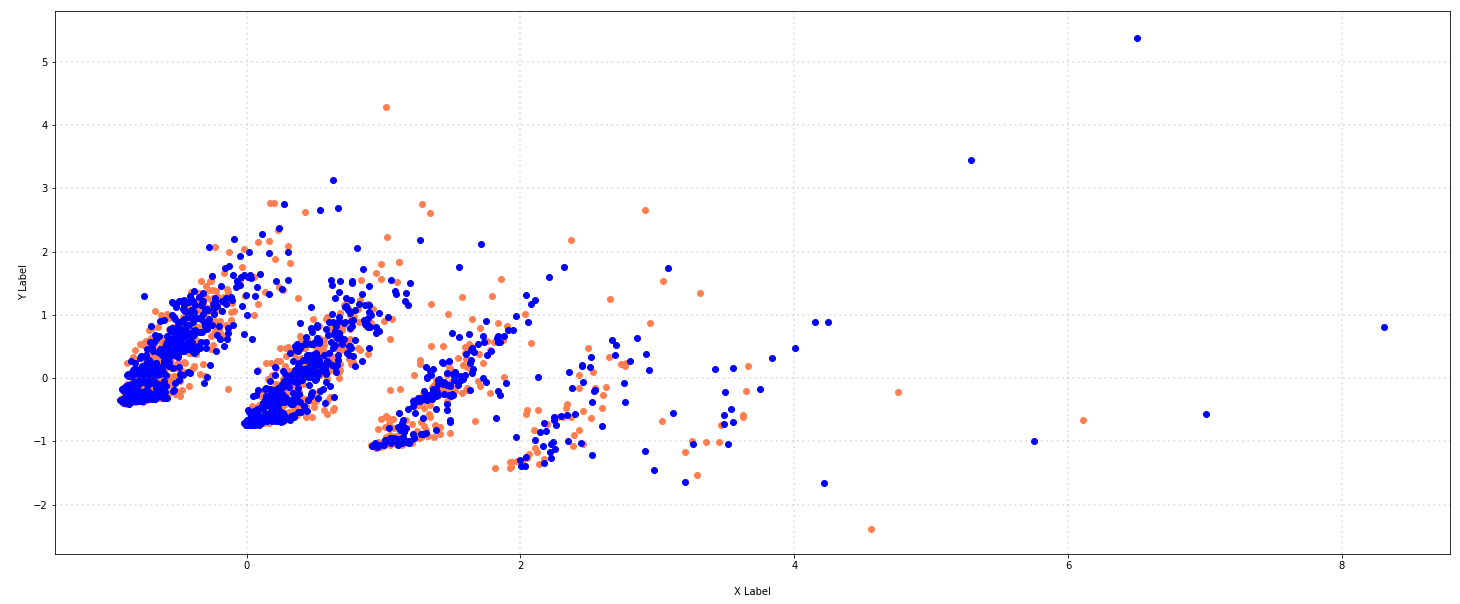

In [32]:
#do PCA to reduce the dimension
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, ['0','1']):
    xs = X_reduced[df['label'] == category].T[0]
    ys = X_reduced[df['label'] == category].T[1]
    print(xs)
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [33]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [34]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[200:250]

array([   3,   34,    1,    9,    7,    3,    2,    2,    2,    2,    8,
          1,    2,    1,  106,    1, 1138,    1,    3,    1,    3,    1,
          2,    2,    2,    1,    1,    1,    1,    3,    1,    1,    3,
          1,    7,   22,    2,    1,    1,    1,    1,    1,    1,   53,
          1,   23,   15,    5,    4,    1], dtype=int64)

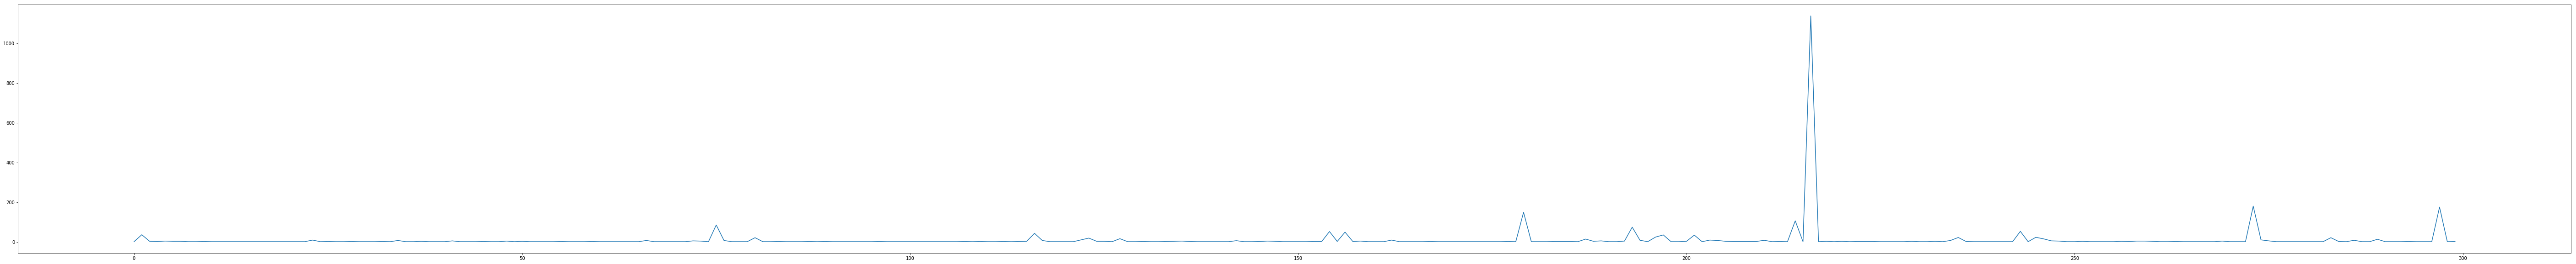

In [35]:
#plot the distribution of term frequencies
plt.subplots(figsize=(100, 10))
g = plt.plot(term_frequencies[:300])

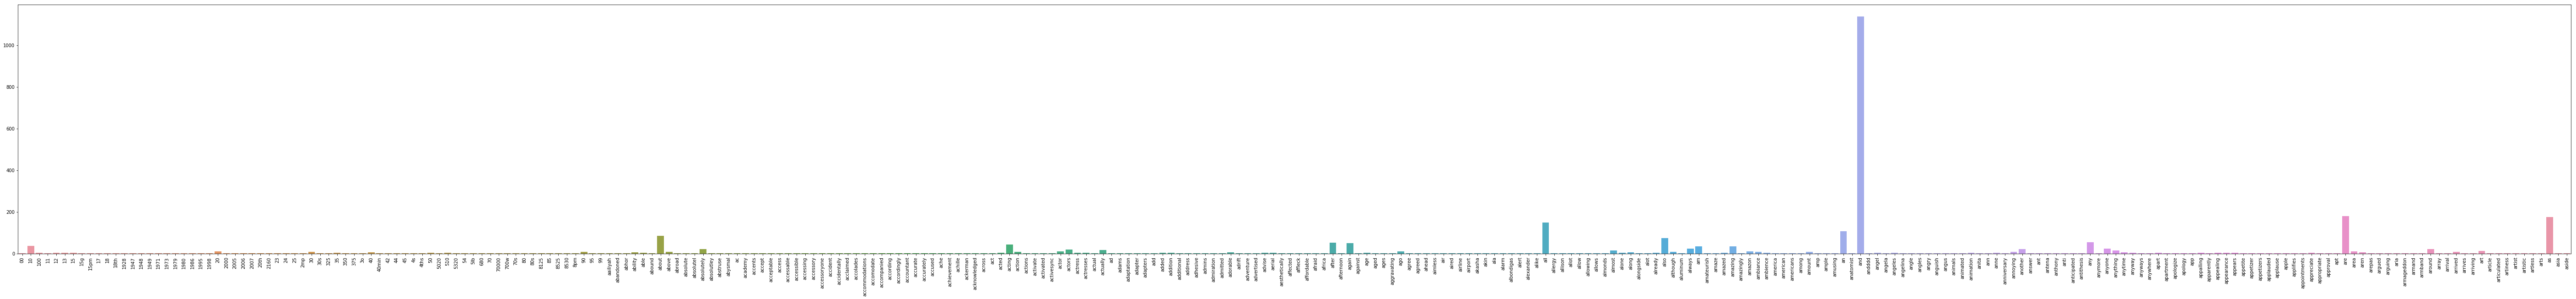

In [69]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### New Visualization

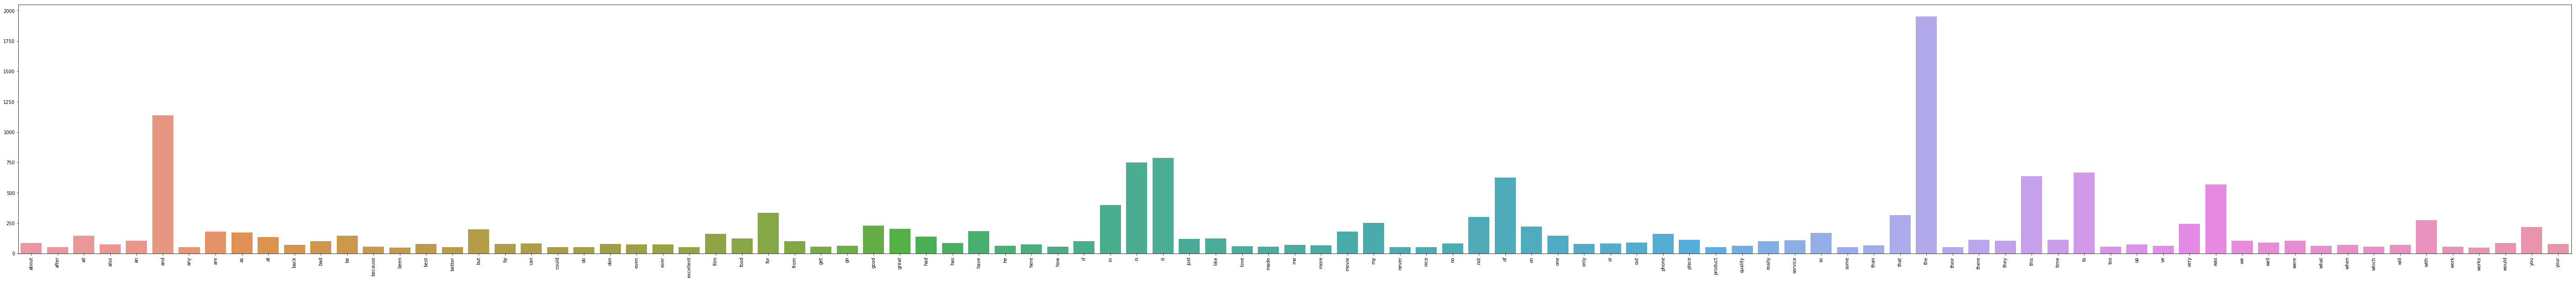

In [81]:
#only show frequencies greater than 50

plt.subplots(figsize=(100, 10))

term_names = count_vect.get_feature_names()
g = sns.barplot(x=[term_names[i] for i in range(len(term_names)) if term_frequencies[i] > 50], 
            y=[term_frequencies[i] for i in range(len(term_frequencies)) if term_frequencies[i] > 50])
g.set_xticklabels([term_names[i] for i in range(len(term_names)) if term_frequencies[i] > 50], rotation = 90);

In [64]:
from sklearn.manifold import TSNE

col = ['coral', 'blue', 'black', 'm']

#do TSNE rather than PCA to reduce the dimension
#TSNE is more likely to output better distributed data for visualization
embeddings = TSNE(n_components=2)
x_TSNE = embeddings.fit_transform(X_counts.toarray())

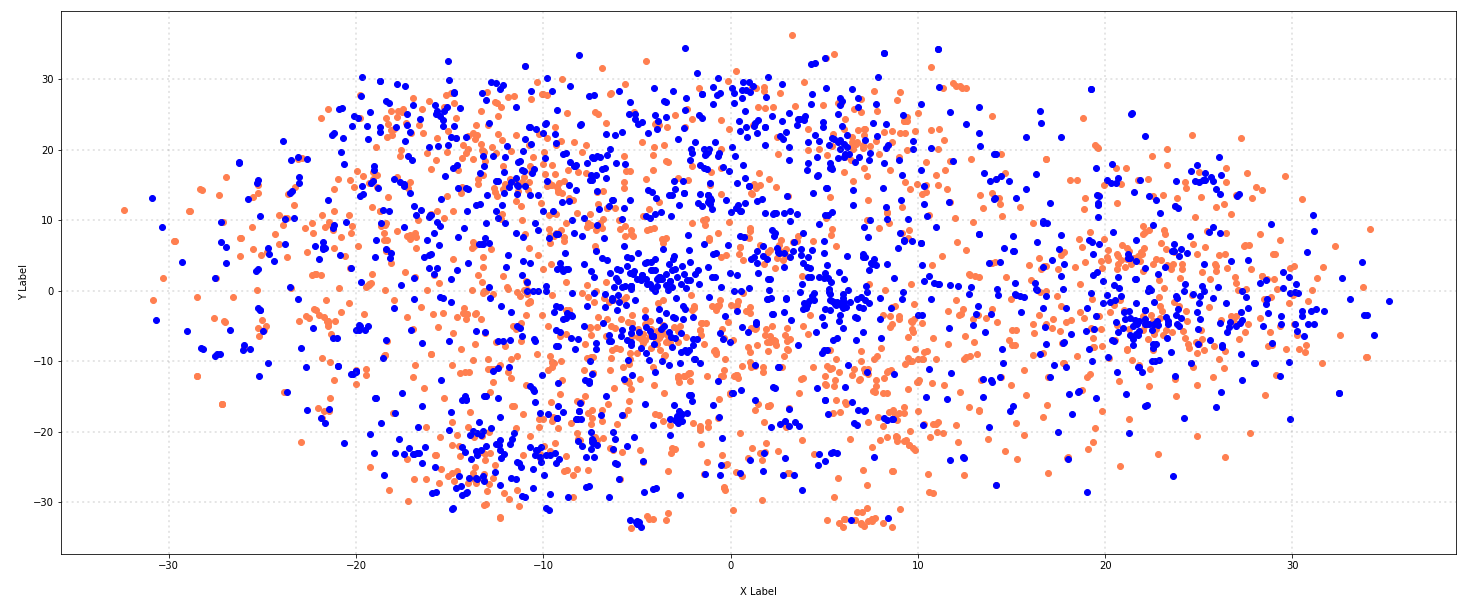

In [66]:
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, ['0','1']):
    xs = x_TSNE[df['label'] == category].T[0]
    ys = x_TSNE[df['label'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### TF-IDF Vectorizer

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,1))
X_tfidf = tfidf.fit_transform(df.sentence)

### Cosine Similarity

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances

# create two example sentence to test their similarity
sentence1 = ["I like dog"]
sentence2 = ["I like cat"]
vec1 = tfidf.transform(sentence1)
vec2 = tfidf.transform(sentence2)

print("sentence 1 : ", sentence1)
print("sentence 2 : ", sentence2)

# try different to compte distance using sklearn
print("cosine_similarity : ",cosine_similarity(vec1, vec2))
print("cosine_distance : ",pairwise_distances(vec1, vec2, metric="cosine"))
print("euclidean_distance : ",pairwise_distances(vec1, vec2, metric="euclidean"))
print("l1_distance : ",pairwise_distances(vec1, vec2, metric="l1"))
print("l2_distance : ",pairwise_distances(vec1, vec2, metric="l2"))
print("manhattan_distance : ",pairwise_distances(vec1, vec2, metric="manhattan"))

sentence 1 :  ['I like dog']
sentence 2 :  ['I like cat']
cosine_similarity :  [[0.22918505]]
cosine_distance :  [[0.77081495]]
euclidean_distance :  [[1.24162389]]
l1_distance :  [[1.76948336]]
l2_distance :  [[1.24162389]]
manhattan_distance :  [[1.76948336]]


### Naive Bayes classifier

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X_counts.toarray(), df.label, test_size=0.3)

#use Gaussian Naive Bayes classifier with Bag of Word
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
print('Accuracy with BOW: %.2f' % accuracy_score(Y_test, y_pred))

Accuracy with BOW: 0.68


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf.toarray(), df.label, test_size=0.3)

#use Gaussian Naive Bayes classifier with tf-idf
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
print('Accuracy with tf-idf: %.2f' % accuracy_score(Y_test, y_pred))

Accuracy with tf-idf: 0.72
